In [2]:
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *

from matplotlib import rc
import matplotlib.pylab as plt

#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)

from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

%load_ext autoreload
%autoreload 2

/n/home00/lee.5922/.local/lib/python2.7/site-packages/subprocess32.py:472: RuntimeWarning: The _posixsubprocess module is not being used. Child process reliability may suffer if your program uses threads.
  "program uses threads.", RuntimeWarning)


In [65]:
def plot_z_distribution( cats = None, labels = None, zlabel = 'Z', suffix = 'test' ):
    
    import matplotlib.pyplot as plt
    z_bin, s = np.linspace(1e-5, 1.0, 200, retstep=True)
    z_center = z_bin[:-1]+s/2.
    
    fig, axes = plt.subplots( 1, 1, figsize = (8,5))
    N, _= np.histogram(cats[zlabel], bins = z_bin)
    
    #n = N/ST82Maparea

    axes.bar(z_center, N, s, color='b' )
    axes.set_xlabel('photo_z')
    axes.set_ylabel('n(z)')
    #ax.set_yscale('log')
    axes.legend(loc='best')

    axes.set_title('\nredshift histogram')
    figname ='figure/hist_z_'+suffix+'.png'
    fig.savefig(figname)
    print 'saving fig to ',figname
    
    #DAT = np.column_stack((z_center, n))
    #filename = 'data_txt/z_distribution_'+suffix+'.txt'
    #np.savetxt(filename, DAT, header = 'z, n(z)')
    #print 'saving data to ',filename

In [3]:
# sgc data
import esutil
import numpy as np

path = '/n/des/lee.5922/data/cmass_cat/'

cmass_sgc = esutil.io.read(path+'galaxy_DR12v5_CMASS_South.fits.gz')
cmass_sgc_zcut = cmass_sgc[(cmass_sgc['Z'] > 0.43) & (cmass_sgc['Z'] < 0.7)]
random_sgc = esutil.io.read(path+'random0_DR12v5_CMASS_South.fits.gz')
random_sgc_zcut = random_sgc[(random_sgc['Z'] > 0.43) & (random_sgc['Z'] < 0.7)]

In [74]:
(cmass_sgc_zcut.size-float(cmass_sgc.size))/float(cmass_sgc.size) * 100

-9.70623529768532

Spatial Cut  128183
figsave : figure/spatialtest_.png


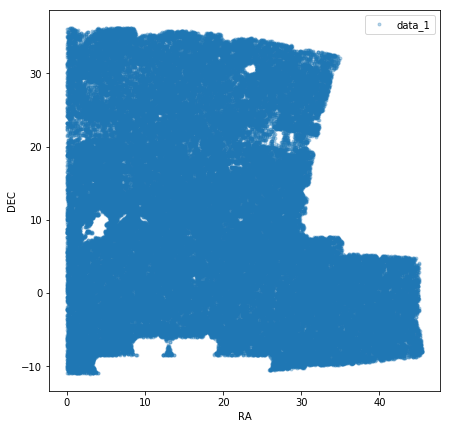

In [67]:
cmass_sgc1 = Cuts.SpatialCuts(cmass_sgc, ra=0, ra2=50, dec=-20, dec2 = 50)
spatialcheck(cmass_sgc1)

saving fig to  figure/hist_z_cmass.png
saving fig to  figure/hist_z_cmass.png


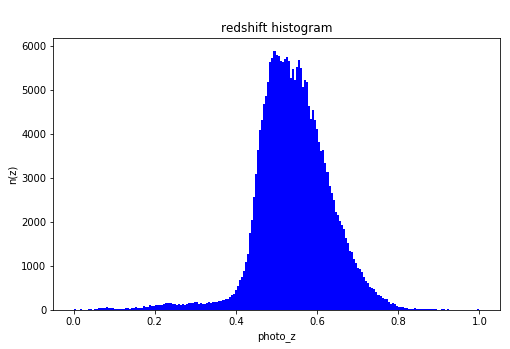

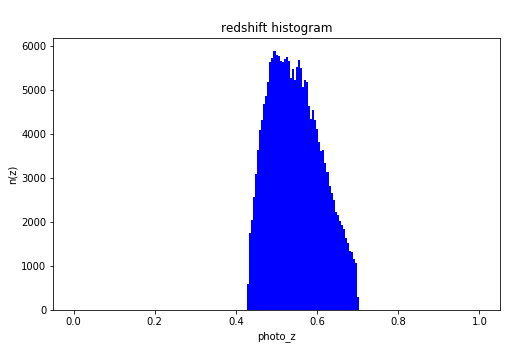

In [69]:
plot_z_distribution( cats = cmass_sgc, labels = 'cmass', zlabel = 'Z', suffix = 'cmass' )
#plot_z_distribution( cats = cmass_sgc_zcut, labels = 'cmass', zlabel = 'Z', suffix = 'cmass' )

In [4]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=67.77, Om0=0.307115)
print 'Calculate comoving distance with FlatLambdaCDM cosmology \nH0=67.77, Om0=0.307115'
sys.stdout.flush()

h = 0.6777
r = cosmo.comoving_distance(cmass_sgc['Z']).value *h
r_rand = cosmo.comoving_distance(random_sgc['Z']).value *h

Calculate comoving distance with FlatLambdaCDM cosmology 
H0=67.77, Om0=0.307115


In [5]:
#import numpy.lib.recfuctions as rf
from numpy.lib import recfunctions as rf
print 'Adding Comoving distance column'
sys.stdout.flush()
cmass_sgc = rf.append_fields( cmass_sgc, 'DC', data = r )
random_sgc = rf.append_fields( random_sgc, 'DC', data = r_rand )


Adding Comoving distance column


In [6]:
cmass_sgc_zcut = cmass_sgc[(cmass_sgc['Z'] > 0.43) & (cmass_sgc['Z'] < 0.7)]
random_sgc_zcut = random_sgc[(random_sgc['Z'] > 0.43) & (random_sgc['Z'] < 0.7)]

In [7]:
#tree corr
from systematics_module.corr import correlation_function_3d, _cfz

#correlation_function_3d(data = cmass_sgc, rand = random_sgc, zlabel='Z', weight = None, njack = 30, suffix = 'cmass_sgc_retest', out = None)
correlation_function_3d(data = cmass_sgc_zcut, rand = random_sgc_zcut, zlabel='Z', 
                        weight = None, njack = 30, suffix = 'cmass_sgc_zcut_retest', out = None)
#w_sgc = cmass_sgc['WEIGHT_SYSTOT']*( cmass_sgc['WEIGHT_CP'] + cmass_sgc['WEIGHT_NOZ'] - 1. )
#w_rand = random_sgc['WEIGHT_FKP']
#data = angular_correlation(data = cmass_sgc, rand = random_sgc, njack = 30, weight = [w_sgc, w_rand], suffix = '_cmass_sgc_noz', out = None)

"""
r, xi, xijkerr = _cfz(cmass_sgc_zcut, random_sgc_zcut, zlabel = 'Z')
suffix = 'cmass_sgc_zcut_r40_180_nbin30'
filename = 'data_txt/cfz_comparison_'+suffix+'.txt'
header = 'r (Mpc/h), xi(r), jkerr'
DAT = np.column_stack((r, xi, xijkerr ))
np.savetxt( filename, DAT, delimiter=' ', header=header )
print "saving data file to : ",filename


r, xi, xijkerr = _cfz(cmass_sgc, random_sgc, zlabel = 'Z')
suffix = 'cmass_sgc_r40_180_nbin30'
filename = 'data_txt/cfz_comparison_'+suffix+'.txt'
header = 'r (Mpc/h), xi(r), jkerr'
DAT = np.column_stack((r, xi, xijkerr ))
np.savetxt( filename, DAT, delimiter=' ', header=header )
print "saving data file to : ",filename
"""




calculate 3d correlation function
JK sampling
X (913, 2)  centers (30, 2)  tol=1e-05  maxiter=200
19 iterations  cluster sizes: [29 32 32 30 29 28 35 32 42 22 31 21 36 26 20 38 40 35 17 16 48 26 33 45 33
 38 23 29 22 25]
X (208426, 2)  centers (30, 2)  tol=1e-05  maxiter=200
92 iterations  cluster sizes: [5921 6667 7279 7363 7558 6599 7397 7196 6578 5314 7232 6042 6587 7487 7657
 9253 7379 6703 7311 7317 5583 6161 7724 7371 7613 6128 6932 5650 7240 7184]
cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


cfz running


nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
nbins = 35, min,max sep = 1..80, bin_size = 0.125201
Starting process NN auto-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN cross-correlations
Using 32 threads.
Building NField
Starting 1024 jobs.
Starting process NN auto-correlations
Using 32 threads.
Starting 1024 jobs.


saving data file to :  data_txt/cfz_comparison_cmass_sgc_zcut_retest.txt


'\nr, xi, xijkerr = _cfz(cmass_sgc_zcut, random_sgc_zcut, zlabel = \'Z\')\nsuffix = \'cmass_sgc_zcut_r40_180_nbin30\'\nfilename = \'data_txt/cfz_comparison_\'+suffix+\'.txt\'\nheader = \'r (Mpc/h), xi(r), jkerr\'\nDAT = np.column_stack((r, xi, xijkerr ))\nnp.savetxt( filename, DAT, delimiter=\' \', header=header )\nprint "saving data file to : ",filename\n\n\nr, xi, xijkerr = _cfz(cmass_sgc, random_sgc, zlabel = \'Z\')\nsuffix = \'cmass_sgc_r40_180_nbin30\'\nfilename = \'data_txt/cfz_comparison_\'+suffix+\'.txt\'\nheader = \'r (Mpc/h), xi(r), jkerr\'\nDAT = np.column_stack((r, xi, xijkerr ))\nnp.savetxt( filename, DAT, delimiter=\' \', header=header )\nprint "saving data file to : ",filename\n'

In [39]:
pwd

u'/n/des/lee.5922/Dropbox/repositories/CMASS/code'

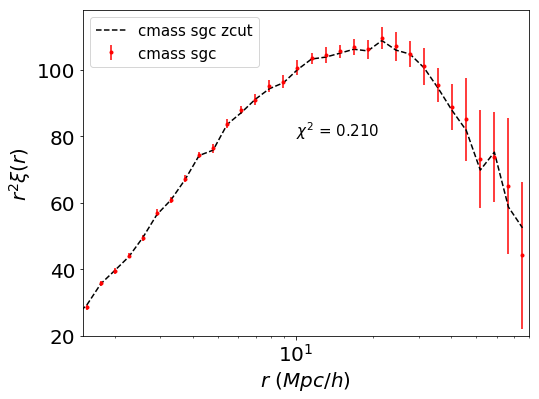

In [40]:
DAT = np.loadtxt('data_txt/cfz_comparison_cmass_sgc_zcut_r5_200.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]
DAT2 = np.loadtxt('data_txt/cfz_comparison_cmass_sgc_zcut_retest.txt')
meanr2, xi2, xi_err2 = [DAT2[:,i] for i in range(3)]

DAT3 = np.loadtxt('data_txt/cfz_comparison_cmass_sgc_retest.txt')
meanr3, xi3, xi_err3 = [DAT3[:,i] for i in range(3)]

DAT_measurement = np.genfromtxt('../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_LOWZDR12_CMASSDR12_correlation_function_monopole_z43z75.dat')
r_measurement = DAT_measurement[:,0]
xi_mono_measu = DAT_measurement[:,1]

chisqr = np.sum( (xi2[2:]-xi3[2:])**2/xi_err3[2:]**2 )*1./xi2[2:].size

fig, ax = plt.subplots(1, 1, figsize = (8, 6))
#ax.errorbar(meanr, meanr**2*xi, yerr = meanr**2*xi_err, fmt = 'r-', label='cmass sgc nbin100')
ax.plot(meanr2, meanr2**2*xi2, 'k--', label='cmass sgc zcut')
#ax.errorbar(meanr2, meanr2**2*xi2, yerr = meanr2**2*xi_err2, fmt = 'k--', label='cmass sgc zcut')
ax.errorbar(meanr3, meanr3**2*xi3, yerr = meanr3**2*xi_err3, fmt = 'r.', label='cmass sgc')
#ax.plot(r_measurement*1.02, r_measurement**2*xi_mono_measu, label='Ibanez measurement ')
ax.set_xscale('log')
ax.set_yscale('linear')
ax.legend(loc = 'best', fontsize = 15)
#ax.set_ylim(1e-3,)
ax.set_xlabel(r'$r$ $(Mpc/h)$', size=20)
ax.set_ylabel(r'$r^2 \xi(r)$', size=20)
ax.set_xlim(1.5, 80)
ax.set_ylim(20,)
ax.tick_params(labelsize = 20)
ax.text(10, 80, r'$\chi^2$ = {:0.3f}'.format(chisqr), fontsize = 15)

"""

fraciff = (xi2-xi3)
ax2.errorbar(meanr2, fraciff, yerr = xi_err2, fmt = 'k-', label='fracdiff')
ax2.set_xscale('log')
ax2.set_yscale('linear')
ax2.legend(loc = 'best', fontsize = 20)
#ax.set_ylim(1e-3,)
ax2.set_xlabel(r'$r$ $(Mpc/h)$', size=20)
ax2.set_ylabel('fractional diff', size=20)
ax2.set_xlim(1.5, 80)
ax2.set_ylim(-0.05,0.05)
ax2.tick_params(labelsize = 20)
"""

fig.savefig('figure/cfz_comparison_zcut.pdf')
#fig.savefig('figure/acf_comparison.png')


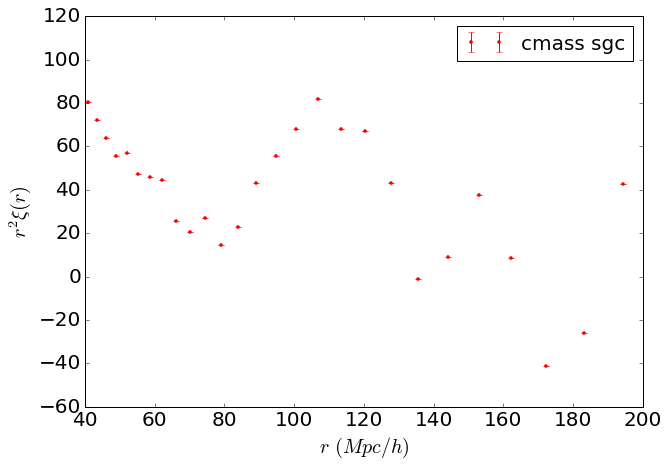

In [110]:
#DAT = np.loadtxt('data_txt/acf_comparison_dmass_spt.txt')

fig, ax = plt.subplots(figsize = (10, 7))
ax.errorbar(dd.meanr, dd.meanr**2 * xi, yerr = varxi, fmt = '.r', label='cmass sgc')
#ax.errorbar(dd.meanr,xi, yerr = varxi, fmt = '.r', label='cmass sgc')
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.legend(loc = 'best', fontsize = 20)
#ax.set_ylim(1e-3,)
ax.set_xlabel(r'$r$ $(Mpc/h)$', size=20)
ax.set_ylabel(r'$r^2 \xi(r)$', size=20)
ax.set_xlim(40, 200)
ax.tick_params(labelsize = 20)
#fig.savefig('figure/acf_comparison.pdf')
#fig.savefig('figure/acf_comparison.png')

In [62]:
DAT_the = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/datav/cmass_sgc.datavector')

In [63]:
F = open('/n/des/lee.5922/programs/cosmolike/MG_musigma/datav/cmass_sgc_2.datavector', "w")
for i in range(DAT_the.size):
    F.write('{0:2d}  {0:2e}\n'.format(int(i), DAT_the[i]))
    print '{0:2d}  {0:2e}'.format(int(i), DAT_the[i])

 0  0.000000e+00
 1  1.000000e+00
 2  2.000000e+00
 3  3.000000e+00
 4  4.000000e+00
 5  5.000000e+00
 6  6.000000e+00
 7  7.000000e+00
 8  8.000000e+00
 9  9.000000e+00
10  1.000000e+01
11  1.100000e+01
12  1.200000e+01
13  1.300000e+01
14  1.400000e+01
15  1.500000e+01
16  1.600000e+01
17  1.700000e+01
18  1.800000e+01
19  1.900000e+01
20  2.000000e+01
21  2.100000e+01
22  2.200000e+01
23  2.300000e+01
24  2.400000e+01
25  2.500000e+01
26  2.600000e+01
27  2.700000e+01
28  2.800000e+01
29  2.900000e+01
30  3.000000e+01
31  3.100000e+01
32  3.200000e+01
33  3.300000e+01
34  3.400000e+01
35  3.500000e+01
36  3.600000e+01
37  3.700000e+01
38  3.800000e+01
39  3.900000e+01
40  4.000000e+01
41  4.100000e+01
42  4.200000e+01
43  4.300000e+01
44  4.400000e+01
45  4.500000e+01
46  4.600000e+01
47  4.700000e+01
48  4.800000e+01
49  4.900000e+01
50  5.000000e+01
51  5.100000e+01
52  5.200000e+01
53  5.300000e+01
54  5.400000e+01
55  5.500000e+01
56  5.600000e+01
57  5.700000e+01
58  5.800000e+

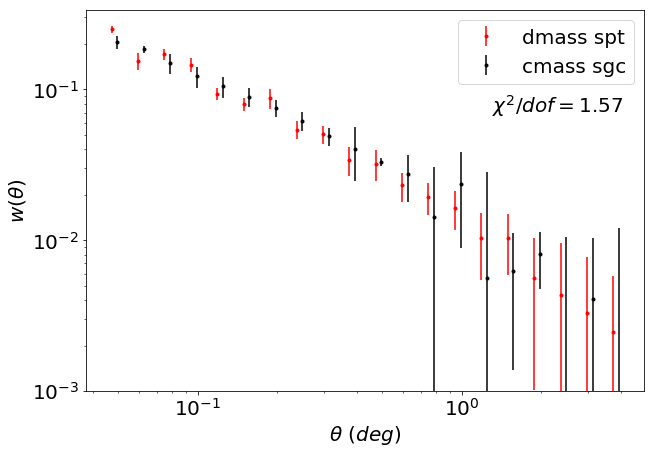

In [42]:
DAT_the = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/datav/dmass_spt_30.datavector')[-20:]
DAT_the09 = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/datav/like_dmass_spt_bias0.9.test_datavector')[:,1][-20:]
tbins = np.logspace(np.log10(2.5), np.log10(250), 20)/60

#DAT = np.loadtxt('data_txt/acf_comparison_dmass_spt.txt')
DAT = np.loadtxt('data_txt/acf_comparison_dmass_spt_30_test.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]
DAT2 = np.loadtxt('data_txt/acf_comparison_cmass_sgc_noz.txt')
meanr2, xi2, xi_err2 = [DAT2[:,i] for i in range(3)]
#DAT3 = np.loadtxt('data_txt/acf_comparison_cmass_sgc_noz.txt')
#meanr3, xi3, xi_err3 = [DAT3[:,i] for i in range(3)]

fig, ax = plt.subplots(figsize = (10, 7))
ax.errorbar(meanr, xi, yerr = xi_err, fmt = '.r', label='dmass spt')
ax.errorbar(meanr2*1.05, xi2, yerr = xi_err2, fmt = '.k', label='cmass sgc')
#ax.errorbar(meanr3*0.95, xi3, yerr = xi_err3, fmt = '.b', label='dmass spt rand')
#ax.loglog(tbins, DAT_the, label='theory')
#ax.loglog(tbins, DAT_the09, label='theory, b09')
chisqr = np.sum((xi - xi2)**2/xi_err**2 )
chisqr_dof = np.sum((xi - xi2)**2/xi_err**2 ) *1./xi.size

ax.text(1.3,0.07,r'$\chi^2/dof = {:>0.2f}$'.format(chisqr_dof), fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 20)
ax.set_ylim(1e-3,)
ax.set_xlabel(r'$\theta$ $(deg)$', size=20)
ax.set_ylabel(r'$w(\theta)$', size=20)

ax.tick_params(labelsize = 20)
#fig.savefig('figure/acf_comparison.pdf')
#fig.savefig('figure/acf_comparison.png')

sample size (764, 1) (22160, 1)


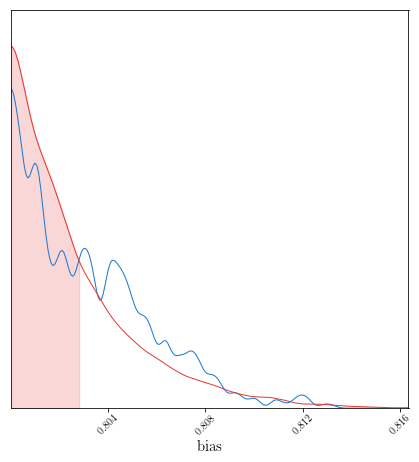

In [100]:
import sys
sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/')
from plot_chain import plot_single, plot_triple, plot_distributions, plot_summary_bar
path = '../../bandpower/SNR/'
cmass_chains = np.genfromtxt(path+'like/like_mcmc_ibanez_xionly_b_02_sam120000')[1000:,:-1]
dmass_chains = np.genfromtxt(path+'like/like_mcmc_ibanez_xionly_b_02_zcut_sam120000')[1000:,:-1]
print 'sample size', cmass_chains.shape, dmass_chains.shape
params = ['bias']
truth = [1.0]
figname = 'figure/like_test.png'
chain_names = ['cmass', 'dmass', 'dmass with cmass cov']
#plot_triple([cmass_chains, cmass_chains], 
#            [params, params], 
#            None, figname, chain_names = chain_names)

#plot_single(dmass_chains, params, truth, figname)

plot_distributions([cmass_chains, dmass_chains], params, params_truth = None, chain_names = chain_names)
#plot_summary_bar([cmass_chains, dmass_chains, dmass_chains_cmasscov], params, params_truth=None, chain_names=chain_names)



In [7]:
#cosmoLike_datav = np.zeros()
theory_vector = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/data_txt/datav/mcmc_ibanez_xionly_b_monopole.datavector')
mask =  np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/bandpower/SNR/data_txt/datav/mcmc_ibanez_xionly_b_monopole.mask')
wtheta_cmass = np.genfromtxt('data_txt/acf_comparison_cmass_sgc_noz.txt')

In [ ]:
emptyarray = np.zeros(mask.size)
emptyarray[]

In [6]:
theory_vector.size

1584

In [24]:
np.sum((xi - xi2)**2/xi_err**2 ), np.sum((xi - xi2)**2/xi_err**2 )/xi.size

(32.554344724502975, 1.6277172362251489)

In [22]:
#tree corr
from systematics_module.corr import two_point_function
#two_point_function(data = dmass_spt, rand = GoldMask_spt, ztag = 'DESDM_ZP', suffix = '_dmass_spt')
#angular_correlation(data = dmass_spt, rand = random_spt, weight = None, suffix = '_dmass_spt_rand', out = None)
w_sgc = cmass_sgc['WEIGHT_SYSTOT']*( cmass_sgc['WEIGHT_CP'] + cmass_sgc['WEIGHT_NOZ'] - 1. )
w_rand = random_sgc['WEIGHT_FKP']
two_point_function(data = cmass_sgc, rand = random_sgc, njack = 2, ztag = 'Z', weight = [w_sgc, w_rand], suffix = '_cmass_sgc_z')

calculate angular correlation function
X (960, 2)  centers (2, 2)  tol=1e-05  maxiter=200
9 iterations  cluster sizes: [450 510]
X (230831, 2)  centers (2, 2)  tol=1e-05  maxiter=200
19 iterations  cluster sizes: [106433 124398]


KeyboardInterrupt: 

In [163]:
# calling im3shape'
from cmass_modules.io import getCatalogsWithKeys
shear = getCatalogsWithKeys(keyword = 'im3shape_st82.fits', path = '/n/des/lee.5922/data/')
shear = shear[shear['INFO_FLAG'] == 0]
#shear = changeColumnName( shear, name = 'RA_AS', rename = 'RA' )
#shear = changeColumnName( shear, name = 'DEC_AS', rename = 'DEC' )
shear = Cuts.keepGoodRegion(shear)
shear = Cuts.SpatialCuts(shear, ra=320, ra2=360 , dec=-2, dec2=2 )

Spatial Cut  2108394


In [57]:
# calling cmass
cmass = io.getSGCCMASSphotoObjcat()
cmass = Cuts.keepGoodRegion(cmass)
cmass = Cuts.SpatialCuts(cmass, ra=320, ra2=360, dec=-2, dec2=2)
m1, m2, _ = esutil.htm.HTM(10).match(cmass['RA'], cmass['DEC'], gold_prob_cat['RA'], \
                                     gold_prob_cat['DEC'], 1./3600, maxmatch=1)
cmass_mask = np.zeros(gold_prob_cat.size, dtype=bool)
cmass_mask[m2] = 1
clean_cmass_data_des, nocmass = gold_prob_cat[cmass_mask], gold_prob_cat[~cmass_mask]


--------------------------------
 calling BOSS SGC CMASS catalog
--------------------------------
Applying Healpix BOSS SGC footprint mask
Change healpix mask to spatial cut later..... Don't forget!!! 
Spatial Cut  10331


In [15]:
#------------------------------------------------------------
# Set up correlation function computation
#  This calculation takes a long time with the bootstrap resampling,
#  so we'll save the results.
#bins = 10 ** np.linspace(np.log10(1. / 60.), np.log10(6), 16)
bins = np.linspace(0, 1/60. * 200, 201)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

bins_log = 10 ** np.linspace(np.log10(1. / 60.), np.log10(6), 16)
#bins = np.linspace(0.0, 1.5, 16)
bin_centers_log = 0.5 * (bins_log[1:] + bins_log[:-1])


#@pickle_results("correlation_functions_DMASS_st82_even.pkl")
def compute_results(data, bins = None, Nbootstraps=10,  method='landy-szalay', rseed=0):
    
    from astroML.correlation import bootstrap_two_point_angular
    
    np.random.seed(rseed)
    Nbins = bins.size
    
    results = [bins]
    results += bootstrap_two_point_angular(data['RA'], data['DEC'],bins=bins,method=method,Nbootstraps=Nbootstraps)
    return results

In [ ]:
#(bins, r_corr, r_corr_err, r_bootstraps,
# b_corr, b_corr_err, b_bootstraps) = compute_results()

(bins, c_corr, c_corr_err, c_bootstraps) = compute_results(dmass_spt, bins=bins)
(bins, d_corr, d_corr_err, d_bootstraps) = compute_results(cmass_sgc, bins=bins)

DAT = np.column_stack((bin_centers, c_corr, c_corr_err, d_corr, d_corr_err) )
np.savetxt('data_txt/corr_dmass_cmass.txt', DAT, header = 'bin_centers, c_corr2, c_corr_err2, d_corr2, d_corr_err2' )

#(bins, d_corr2, d_corr_err2, d_bootstraps2) = compute_results(dmass_st82, bins=bins)
#(bins_log, d_corr, d_corr_err, d_bootstraps) = compute_results(dmass_st82, bins=bins_log)

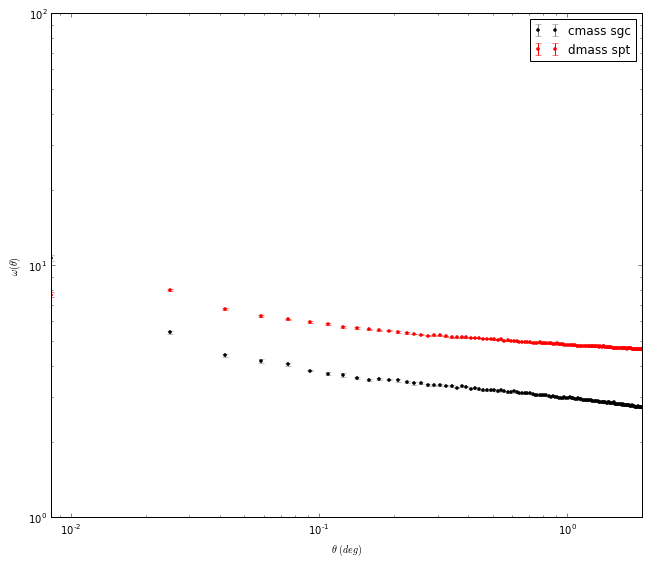

In [61]:
#------------------------------------------------------------
# Plot the results
#corr = [r_corr, b_corr]
#corr_err = [r_corr_err, b_corr_err]
#bootstraps = [r_bootstraps, b_bootstraps]



#labels = '$CMASS~in~st82$\n$N=%i$' % len(cmass)

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(bottom=0.2, top=0.9,
                    left=0.13, right=0.95)

ax = fig.add_subplot(111, xscale='linear', yscale='linear')
ax.errorbar(bin_centers, c_corr, c_corr_err,
            fmt='.k', ecolor='gray', lw=1, label = 'cmass sgc')
ax.errorbar(bin_centers, d_corr, d_corr_err,
            fmt='.r', ecolor='red', lw=1, label='dmass spt')
#ax.errorbar(bin_centers, d_corr, d_corr_err,
#            fmt='.b', ecolor='blue', lw=1, label='cmass in des')

#t = np.array([0.01, 10])
#ax.plot(t, 10 * (t / 0.0005) ** -0.7, ':k', linewidth=1)

#ax.text(0.95, 0.95, labels,
#        ha='right', va='top', transform=ax.transAxes)
ax.set_xlabel(r'$\theta\ (deg)$')
ax.set_ylabel(r'$\omega(\theta)$')
#ax.set_xscale('linear')
#if i == 0:
#    ax.set_ylabel(r'$\hat{w}(\theta)$')
ax.legend(loc='best')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0, 2)     
plt.show()

fig.savefig('figure/acf_comparison_dmass_cmass.png')

saving fig to  figure/hist_z_cmass_st82.png
saving data to  data_txt/z_distribution_cmass_st82.txt


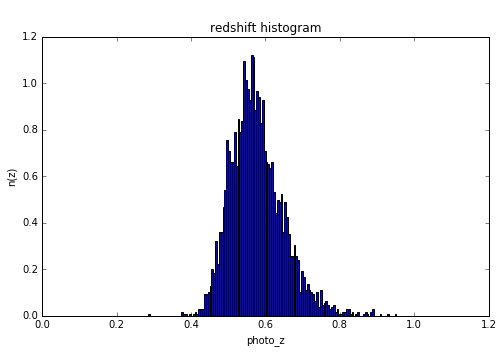

In [79]:
plot_z_distribution( cats = clean_cmass_data_des, labels = 'cmass_st82', suffix = 'cmass_st82' )

saving fig to  figure/hist_z_dmass_st82.png
saving data to  data_txt/z_distribution_dmass_st82.txt


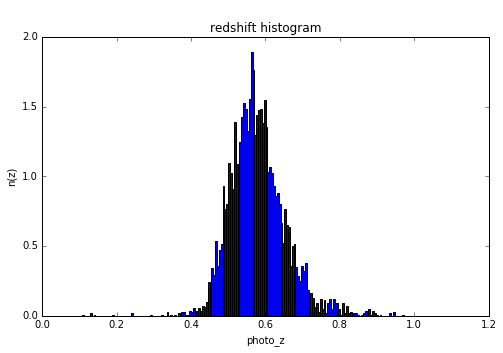

In [80]:
plot_z_distribution( cats = dmass_st82, labels = 'dmass_st82', suffix = 'dmass_st82' )

In [75]:
plot_z_distribution( cats = dmass_st82, labels = 'dmass_st82', suffix = 'dmass_st82' )

NameError: name 'plot_z_distribution' is not defined

In [ ]:
plot_z_distribution( cats = dmass_st82, labels = '_dmass_st82', suffix = 'dmass_st82_binedge' )

In [58]:
dmass_st82.shape

(5487,)

In [22]:
def ra_dec_to_xyz(ra, dec):
    """Convert ra & dec to Euclidean points
    Parameters
    ----------
    ra, dec : ndarrays
    Returns
    x, y, z : ndarrays
    """
    sin_ra = np.sin(ra * np.pi / 180.)
    cos_ra = np.cos(ra * np.pi / 180.)

    sin_dec = np.sin(np.pi / 2 - dec * np.pi / 180.)
    cos_dec = np.cos(np.pi / 2 - dec * np.pi / 180.)

    return (cos_ra * sin_dec,
            sin_ra * sin_dec,
            cos_dec)

def uniform_sphere(RAlim, DEClim, size=1):
    """Draw a uniform sample on a sphere
    Parameters
    ----------
    RAlim : tuple
        select Right Ascension between RAlim[0] and RAlim[1]
        units are degrees
    DEClim : tuple
        select Declination between DEClim[0] and DEClim[1]
    size : int (optional)
        the size of the random arrays to return (default = 1)
    Returns
    -------
    RA, DEC : ndarray
        the random sample on the sphere within the given limits.
        arrays have shape equal to size.
    """
    zlim = np.sin(np.pi * np.asarray(DEClim) / 180.)

    z = zlim[0] + (zlim[1] - zlim[0]) * np.random.random(size)
    DEC = (180. / np.pi) * np.arcsin(z)
    RA = RAlim[0] + (RAlim[1] - RAlim[0]) * np.random.random(size)
    
    return RA, DEC

def uniform_random_on_sphere(data, size = None, ratag='RA', dectag='DEC', ztag='Z' ):
    ra = data[ratag]
    dec = data[dectag]
    z = data[ztag]
    n_features = ra.size
    #size = 100 * data.size
    
    # draw a random sample with N points
    ra_R, dec_R = uniform_sphere((min(ra), max(ra)),
                                 (min(dec), max(dec)),
                                 size)
    #data = np.asarray(ra_dec_to_xyz(ra, dec), order='F').T
    #data_R = np.asarray(ra_dec_to_xyz(ra_R, dec_R), order='F').T
    
    #random redshift distribution
    mu, sigma = np.mean(z), np.std(z)
    z_R = np.random.normal(mu, sigma, size)
    
    data_R = np.zeros((ra_R.size,), dtype=[(ratag, 'float'), (dectag, 'float'), (ztag, 'float')])
    data_R[ratag] = ra_R
    data_R[dectag] = dec_R
    data_R[ztag] = z_R
                              
    return data_R

In [8]:
data_R = uniform_random_on_sphere(dmass_st82, size = 100 * dmass_st82.size)
data_R = Cuts.keepGoodRegion(data_R)
data_R_t = uniform_random_on_sphere(clean_cmass_data_des, size = 100 * cmass.size)
data_R_t = Cuts.keepGoodRegion(data_R_t)

NameError: name 'dmass_st82' is not defined

In [60]:
data_R.size, dmass_st82.size

(44215, 5487)

In [63]:
from systematics_module.corr import angular_correlation,cross_angular_correlation
#angular_correlation(data = dmass_st82, rand = data_R, weight = None, suffix = '_dmass_st82', out = None)
#angular_correlation(data = clean_cmass_data_des, rand = data_R_t, weight = None, suffix = '_cmass_st82', out = None)
cross_angular_correlation(data = clean_cmass_data_des, data2 = dmass_st82, rand = data_R_t, rand2= data_R, njack = 30,\
                          weight = None, suffix = '_cmass_dmass_st82', out=None)

X (300, 2)  centers (30, 2)  tol=1e-05  maxiter=200
8 iterations  cluster sizes: [11  9  9 13 12 22  8  9 11 10  6  4 10 14 14 10  7 12 11  4 10  6  8 18  9
 11  6  5  9 12]
X (3420, 2)  centers (30, 2)  tol=1e-05  maxiter=200
14 iterations  cluster sizes: [ 86 138  93 126 121 213  54 122 175  61  78  88 107 167 107  73 110 126
 158  46  60 111 108 129 140 133 143  70 107 170]
saving data file to :  data_txt/acf_cross_cross_st82.txt


In [66]:
cp data_txt/acf_cross_cross_st82.txt data_txt/acf_cross_cmass_dmass_st82.txt

In [70]:
DAT = np.loadtxt('data_txt/acf_comparison_dmass_st82.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]
DAT2 = np.loadtxt('data_txt/acf_comparison_cmass_st82.txt')
meanr2, xi2, xi_err2 = [DAT2[:,i] for i in range(3)]
DAT3 = np.loadtxt('data_txt/acf_cross_cmass_dmass_st82.txt')
meanr3, xi3, xi_err3 = [DAT3[:,i] for i in range(3)]

In [71]:
dmass_st82.size, clean_cmass_data_des.size

(5487, 3420)

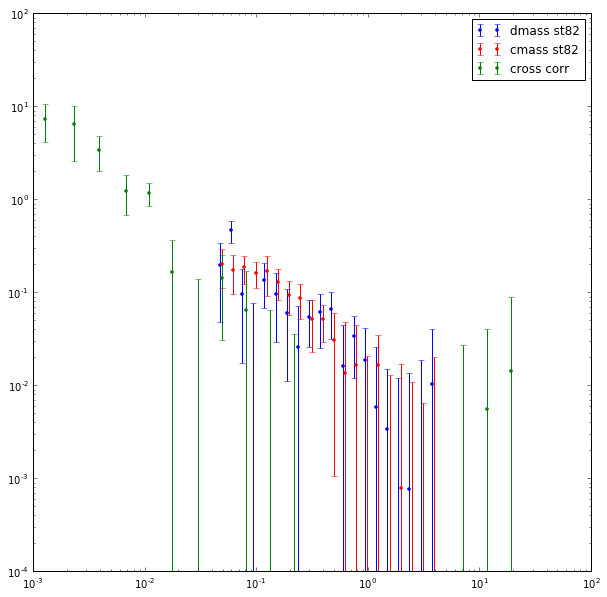

In [72]:
fig, ax = plt.subplots(figsize = (10,10))
ax.errorbar(meanr, xi, yerr = xi_err, fmt = '.b', label='dmass st82')
ax.errorbar(meanr2*1.05, xi2, yerr = xi_err2, fmt = '.r', label='cmass st82')
ax.errorbar(meanr3*1.1, xi3, yerr = xi_err3, fmt = '.g', label='cross corr')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best')

In [ ]:
# angular correlation function of SPT and SGC

In [9]:
dmass_spt = esutil.io.read('/n/des/lee.5922/data/dmass_cat/dmass_spt_30.fits')

In [34]:
data_R = uniform_random_on_sphere(dmass_spt, size = 10 * dmass_spt.size, ztag='DESDM_ZP')
data_R = Cuts.keepGoodRegion(data_R)
data_R_t = uniform_random_on_sphere(cmass_sgc, size = 50 * cmass_sgc.size, ztag='Z')
data_R_t = Cuts.keepGoodRegion(data_R_t)

In [36]:
from systematics_module.corr import angular_correlation,cross_angular_correlation
angular_correlation(data = dmass_spt, rand = data_R, weight = None, suffix = '_dmass_spt_30_nbin20', out = None)
angular_correlation(data = cmass_sgc, rand = random_sgc, weight = None, suffix = '_cmass_sgc_nbin20', out = None)

calculate angular correlation function
X (960, 2)  centers (30, 2)  tol=1e-05  maxiter=200
21 iterations  cluster sizes: [34 40 37 44 43 28 18 18 19 26 39 47 43 30 28 25 30 23 39 24  6 34 42 36 48
 29 37 27 34 32]
X (230831, 2)  centers (30, 2)  tol=1e-05  maxiter=200
48 iterations  cluster sizes: [ 6524  8036  7464  7101  8156  7648  6215  6972  6264  8585 10266  8513
  8792  8530  7353  8457  7785  6474  7923  7029  4144  8160  8805  8477
  8395  7120  7446  8267  8895  7035]
saving data file to :  data_txt/acf_comparison_cmass_sgc_nbin20.txt


0

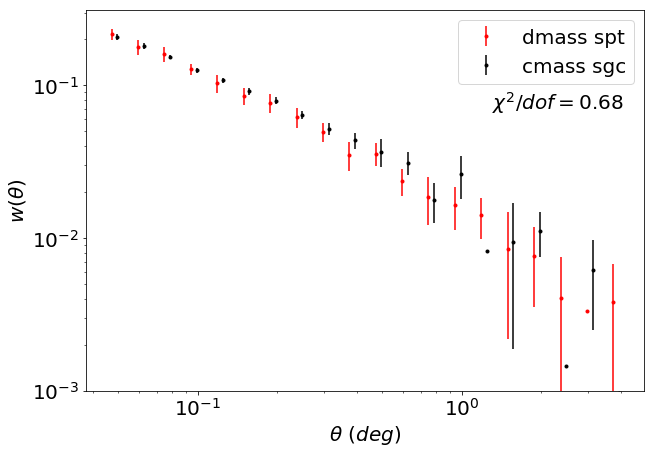

In [39]:
#DAT = np.loadtxt('data_txt/acf_comparison_dmass_spt.txt')
DAT = np.loadtxt('data_txt/acf_comparison_dmass_spt_30_nbin20.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]
DAT2 = np.loadtxt('data_txt/acf_comparison_cmass_sgc_nbin20.txt')
meanr2, xi2, xi_err2 = [DAT2[:,i] for i in range(3)]
#DAT3 = np.loadtxt('data_txt/acf_comparison_cmass_sgc_noz.txt')
#meanr3, xi3, xi_err3 = [DAT3[:,i] for i in range(3)]

fig, ax = plt.subplots(figsize = (10, 7))
ax.errorbar(meanr, xi, yerr = xi_err, fmt = '.r', label='dmass spt')
ax.errorbar(meanr2*1.05, xi2, yerr = xi_err2, fmt = '.k', label='cmass sgc')
#ax.errorbar(meanr3*0.95, xi3, yerr = xi_err3, fmt = '.b', label='dmass spt rand')

chisqr = np.sum((xi - xi2)**2/xi_err**2 )
chisqr_dof = np.sum((xi - xi2)**2/xi_err**2 )/xi.size

ax.text(1.3,0.07,r'$\chi^2/dof = {:>0.2f}$'.format(chisqr_dof), fontsize=20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 20)
ax.set_ylim(1e-3,)
ax.set_xlabel(r'$\theta$ $(deg)$', size=20)
ax.set_ylabel(r'$w(\theta)$', size=20)

ax.tick_params(labelsize = 20)
#fig.savefig('figure/acf_comparison.pdf')
#fig.savefig('figure/acf_comparison.png')

In [69]:
def covertwtheta_to_cosmoLikedatav(wthetadata, nbin, out = ''):
    array = np.zeros(25*nbin)
    array[-1*nbin:] = wthetadata
    np.savetxt(out, array)

In [71]:
dmass_wthetadata = np.genfromtxt('data_txt/acf_comparison_dmass_spt_30_nbin20.txt')[:,1]
cmass_wthetadata = np.genfromtxt('data_txt/acf_comparison_cmass_sgc_nbin20.txt')[:,1]
nbin = 20
path = '/n/des/lee.5922/programs/cosmolike/MG_musigma/datav/'
covertwtheta_to_cosmoLikedatav(dmass_wthetadata, nbin, out= path+'dmass_spt_30.datavector')
covertwtheta_to_cosmoLikedatav(cmass_wthetadata, nbin, out= path+'cmass_sgc.datavector' )

In [66]:
mask = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/datav/like_dmass_spt_bias.test_datavector')

In [67]:
mask

array([[  0.00000000e+00,   2.12433500e-01],
       [  1.00000000e+00,   1.72996100e-01],
       [  2.00000000e+00,   1.42248300e-01],
       [  3.00000000e+00,   1.18966300e-01],
       [  4.00000000e+00,   1.00306200e-01],
       [  5.00000000e+00,   8.52318000e-02],
       [  6.00000000e+00,   7.22639900e-02],
       [  7.00000000e+00,   6.07308400e-02],
       [  8.00000000e+00,   5.03568200e-02],
       [  9.00000000e+00,   4.09522700e-02],
       [  1.00000000e+01,   3.24385700e-02],
       [  1.10000000e+01,   2.49116900e-02],
       [  1.20000000e+01,   1.84316300e-02],
       [  1.30000000e+01,   1.30487100e-02],
       [  1.40000000e+01,   8.75855500e-03],
       [  1.50000000e+01,   5.50341800e-03],
       [  1.60000000e+01,   3.16638100e-03],
       [  1.70000000e+01,   1.61787300e-03],
       [  1.80000000e+01,   7.15852200e-04],
       [  1.90000000e+01,   3.82543800e-04]])

Lensing 

In [ ]:
source_R = uniform_random_on_sphere(shear, size = shear.size)
source_R = Cuts.keepGoodRegion(source_R)

In [192]:
from systematics_module.corr import LensingSignal, cross_angular_correlation, angular_correlation
LensingSignal(lense = clean_cmass_data_des, source = shear, rand = data_R, suffix = 'cmass')
LensingSignal(lense = dmass_st82, source = shear, rand = data_R, suffix = 'dmass')

Calculating lensing signal 
z_l = (0.45, 0.55)  z_s = (0.7, 1.0)
X (179, 2)  centers (10, 2)  tol=1e-05  maxiter=200
13 iterations  cluster sizes: [13 19 13 26 16 12 21 14 25 20]
X (8013, 2)  centers (10, 2)  tol=1e-05  maxiter=200
14 iterations  cluster sizes: [811 668 827 863 702 770 830 826 919 797]
saving data file to :  data_txt/lensing_cmass.txt
Calculating lensing signal 
z_l = (0.45, 0.55)  z_s = (0.7, 1.0)
X (173, 2)  centers (10, 2)  tol=1e-05  maxiter=200
9 iterations  cluster sizes: [17  6 15 24 16 15 16 21 28 15]
X (7564, 2)  centers (10, 2)  tol=1e-05  maxiter=200
11 iterations  cluster sizes: [ 662  521  501  913  958  621  714  763 1090  821]
saving data file to :  data_txt/lensing_dmass.txt


saving fig to : figure/lensing_comparison.png


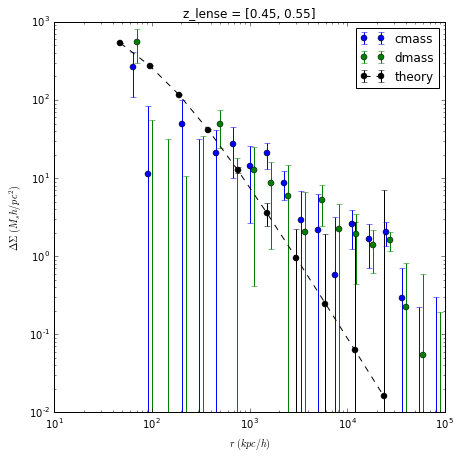

In [193]:
# plotting

labels = ['cmass', 'dmass']
lensingdat = [np.loadtxt('data_txt/lensing_'+s+'.txt') for s in labels ]

#r_p_bins, LensSignal, LSjkerr, correctedLensSignal, CLSjkerr, BoostFactor, Boostjkerr = lensingdat[:,0], lensingdat[:,1],lensingdat[:,2],lensingdat[:,3],lensingdat[:,4],lensingdat[:,5],lensingdat[:,6]
fig, ax = plt.subplots(1,1, figsize = (7,7))

for j in range(len(labels)):

    r_p_bins, LensSignal, LSjkerr = [lensingdat[j][:,i] for i in range(lensingdat[0][0].size)]
    ax.errorbar(r_p_bins * (1 + 0.1*j), LensSignal, yerr = LSjkerr, fmt='o', label = labels[j])

theory = np.loadtxt('data_txt/smd_v_theta_cmass.dat')
rr_the = theory[:,0]
delta_sigma_the = theory[:,1]
error_the = theory[:,2] * np.sqrt(5000/120)
ax.errorbar(10**rr_the, 10**delta_sigma_the, yerr = 10**error_the, color = 'black', fmt='--o', label = 'theory')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(10, 1e5)
ax.set_ylim(1e-2,1e3)
ax.set_xlabel(r'$r$ $(kpc/h)$')
ax.set_ylabel(r'$\Delta\Sigma$ $(M_{s}h/pc^{2})$')
ax.set_title('z_lense = [0.45, 0.55]'  )
ax.legend(loc = 'best')

figname='figure/lensing_comparison.png'
fig.savefig(figname)
print 'saving fig to :', figname